## **Machine Learning Attempt 3: Random Forest**

In this notebook, we attempt to improve the previous machine learning models by using Random Forest.

In [214]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split

# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [215]:
machine_learning_data_ohe_up = pd.read_csv("datasets\\machine-learning-data-ohe-upscaled.csv")
machine_learning_data_ohe_up = machine_learning_data_ohe_up[['Pclass', 'Alone', 'Fare', 'Parch', 'Family_Size', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']]
machine_learning_data_ohe_up

,Pclass,Alone,Fare,Parch,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,0,7.2500,0,2,0.0,1.0,0.0,0.0,1.0,0
1,3,1,8.0500,0,1,0.0,1.0,0.0,0.0,1.0,0
2,3,1,8.4583,0,1,0.0,1.0,0.0,1.0,0.0,0
3,1,1,51.8625,0,1,0.0,1.0,0.0,0.0,1.0,0
4,3,0,21.0750,1,5,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1093,1,0,211.3375,1,2,1.0,0.0,0.0,0.0,1.0,1
1094,1,0,52.5542,1,3,1.0,0.0,0.0,0.0,1.0,1
1095,3,1,9.5000,0,1,0.0,1.0,0.0,0.0,1.0,1
1096,1,0,55.4417,0,2,0.0,1.0,1.0,0.0,0.0,1


In [216]:
y = pd.DataFrame(machine_learning_data_ohe_up['Survived'])
X = pd.DataFrame(machine_learning_data_ohe_up.drop('Survived', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =13)

In [217]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators = 100, max_depth = 4)       

rforest.fit(X_train, y_train.Survived.ravel())

RandomForestClassifier(max_depth=4)

Train Data
Accuracy  :	 0.8216145833333334

TPR Train :	 0.781491002570694
TNR Train :	 0.862796833773087

FPR Train :	 0.13720316622691292
FNR Train :	 0.2185089974293059


<AxesSubplot:>

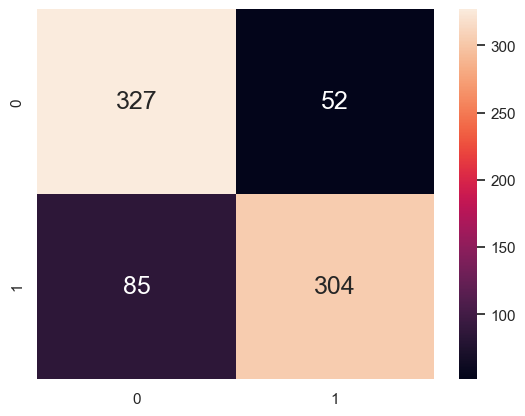

In [218]:
from sklearn.metrics import confusion_matrix

y_train_pred = rforest.predict(X_train)

print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()


cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0]

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8

TPR Test :	 0.71875
TNR Test :	 0.8764705882352941

FPR Test :	 0.12352941176470589
FNR Test :	 0.28125


<AxesSubplot:>

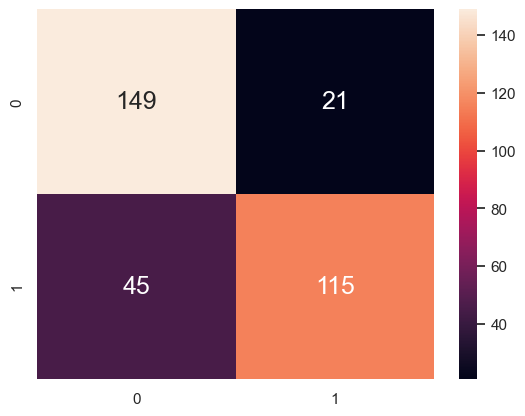

In [219]:
from sklearn.metrics import confusion_matrix

y_test_pred = rforest.predict(X_test)

print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()


cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1]
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Using the default settings of Random Forest, we see that the accuracy of both train and test sets have decreased, TPR has decreased, and FNR has increased. This shows that the default settings of Random Forest did not give us a better result as compared to the decision tree with upscaling. However, we would like to further improve this accuracy and get the best accuracy we can achieve. Hence, we are going to try out hyperparameter tuning. To do this, our group decided to use GridSearch to help us find which hyperparameter value would give us the best results.

In [220]:
from sklearn.ensemble import RandomForestClassifier


y = pd.DataFrame(machine_learning_data_ohe_up['Survived'])
X = pd.DataFrame(machine_learning_data_ohe_up.drop('Survived', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =13)

In [229]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(100,1001,100),  
              'max_depth': np.arange(2, 11)}             

hpGrid = GridSearchCV(RandomForestClassifier(),   
                      param_grid,                 
                      cv = 5,                     
                      scoring = 'accuracy')       

hpGrid.fit(X_train, y_train.Survived.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000])},
             scoring='accuracy')

In [230]:
print(hpGrid.best_estimator_)
print(np.abs(hpGrid.best_score_))

RandomForestClassifier(max_depth=10)
0.8398523045581869


In [223]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(machine_learning_data_ohe_up['Survived'])
X = pd.DataFrame(machine_learning_data_ohe_up.drop('Survived', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=13)

from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators = 300,   
                                 max_depth = 10)       

rforest.fit(X_train, y_train.Survived.ravel())

RandomForestClassifier(max_depth=10, n_estimators=300)

Train Data
Accuracy  :	 0.9401041666666666

TPR Train :	 0.9434447300771208
TNR Train :	 0.9366754617414248

FPR Train :	 0.0633245382585752
FNR Train :	 0.056555269922879174


<AxesSubplot:>

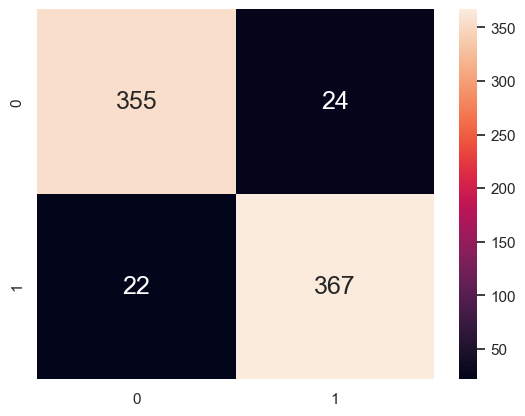

In [224]:
from sklearn.metrics import confusion_matrix

y_train_pred = rforest.predict(X_train)

print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] 
fpTrain = cmTrain[0][1] 
tnTrain = cmTrain[0][0] 
fnTrain = cmTrain[1][0] 

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.8242424242424242

TPR Test :	 0.8
TNR Test :	 0.8470588235294118

FPR Test :	 0.15294117647058825
FNR Test :	 0.2


<AxesSubplot:>

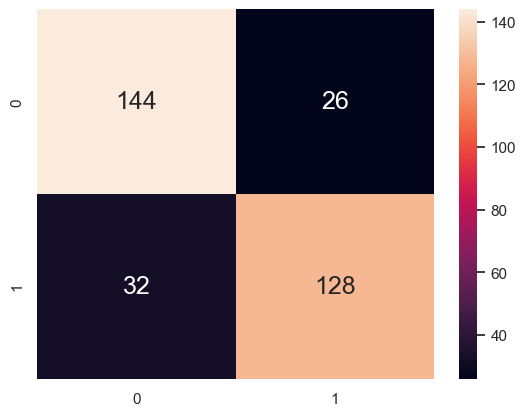

In [225]:
from sklearn.metrics import confusion_matrix

y_test_pred = rforest.predict(X_test)

print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] 
fpTest = cmTest[0][1] 
tnTest = cmTest[0][0] 
fnTest = cmTest[1][0] 

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

After running through the different combinations, we can see that the max depth of 10 provides us with the best accuracy.

After training a model with these parameters, we can see that the accuracy for the train data set improving to 94%, FPR decreasing from 17.4% to 6.3%, FNR decreasing from 17.2% to 5.7% and both the TPR and TNR increasing to 94.3% and 93.7% respectively as compared to the upscaled decision tree.

As for the test data set, the accuracy increased from 76.7% to 82.4%, FPR decreasing from 20% to 15.3% and FNR decreasing from 26.9% to 20% and both the TPR and TNR increasing to 80% and 84.7% respectively.

As such, Random Forest gives us a better model than Decision Tree.